<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/Mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.1 MB/s eta 0:00:00


In [53]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(weights='imagenet')
print(model.summary())

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

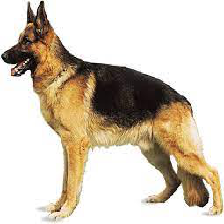

In [54]:
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input,decode_predictions
import numpy as np

img_path = 'dog2.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [55]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [56]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [57]:
#mean centering with respect to Image

x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

1/1 [==============================] - 1s 840ms/step


In [58]:
p

[[('n02106662', 'German_shepherd', 0.94878644),
  ('n02105162', 'malinois', 0.007355352),
  ('n02916936', 'bulletproof_vest', 0.0029962934),
  ('n02111129', 'Leonberg', 0.0018258275),
  ('n03803284', 'muzzle', 0.00087695103)]]